In [1]:
import mnist_library
import keras
import json

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import initializers
from keras import backend as K
from keras.optimizers import Adagrad
from keras.models import load_model

from matplotlib import pyplot as plt

from numpy import argmax

import numpy as np
np.set_printoptions(suppress=True)

Using TensorFlow backend.


In [45]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)

In [24]:
i = 0
models = []
history = []
while(1):
    try:
        model = load_model('model_' + str(i) + '.h5')
        model.load_weights('weights_' + str(i) + '.h5')
        with open('history_' + str(i) + '.json', 'r') as f:
            history.append(json.load(f))
    except OSError:
        break
    models.append(model)
    i = i + 1

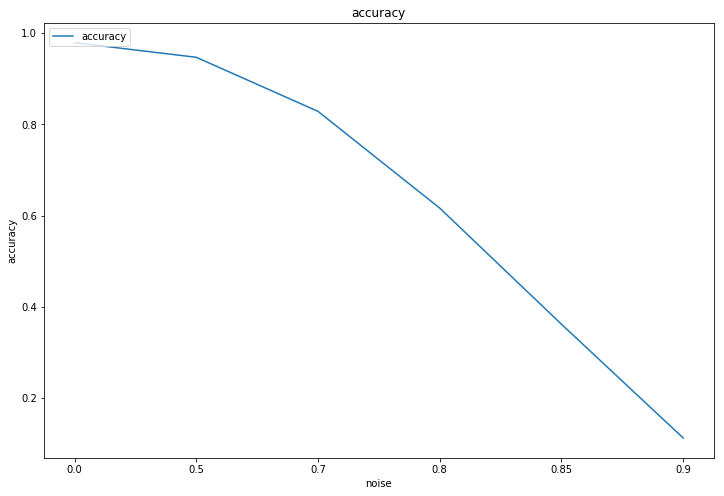

In [25]:
#Ignorar daqui pra baixo
ruidos = [0.0, 0.5, 0.7, 0.8, 0.85, 0.9]
score = []
for i in range(len(models)):
    score.append(models[i].evaluate(test_x, test_y, verbose=0)[1])
    
plt.figure(figsize=(12,8))

xi = [i for i in range(0, len(ruidos))]
plt.plot(xi, score)

plt.xticks(xi, ruidos)

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('noise')
plt.legend(['accuracy', 'noise'], loc='upper left')

plt.show()

In [41]:
#Avaliar modelo
pred_y = []
true_y = []
model_index = 3
correto = 0
incorreto = 0

for i in range(len(test_x)):
    predicted = models[model_index].predict_classes(test_x[i].reshape(1, 784))
    pred_y.append(predicted[0])

for i in test_y:
    true_y.append(argmax(i))

for i in range(len(test_y)):
    if true_y[i] == pred_y[i]:
        correto = correto + 1
    else:
        incorreto = incorreto + 1
print('Correto:', correto, '\nIncorreto:', incorreto)

Correto: 6163 
Incorreto: 3837


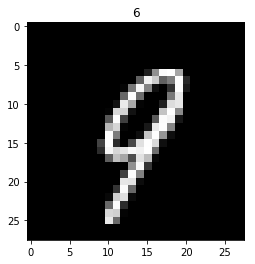

In [36]:
index = 22 #Instância a ser prevista
model_index = 3 #Modelo a ser usado
img = train_x[index]
classname = models[model_index].predict_classes(train_x[index].reshape(1, 784))[0]
plt.imshow(img.reshape(28, 28))
plt.title(classname)
plt.gray()
plt.show()

In [4]:
def plot_loss(history, titulo='loss/epoch'):
    plt.figure(figsize=(12,8))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(titulo)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

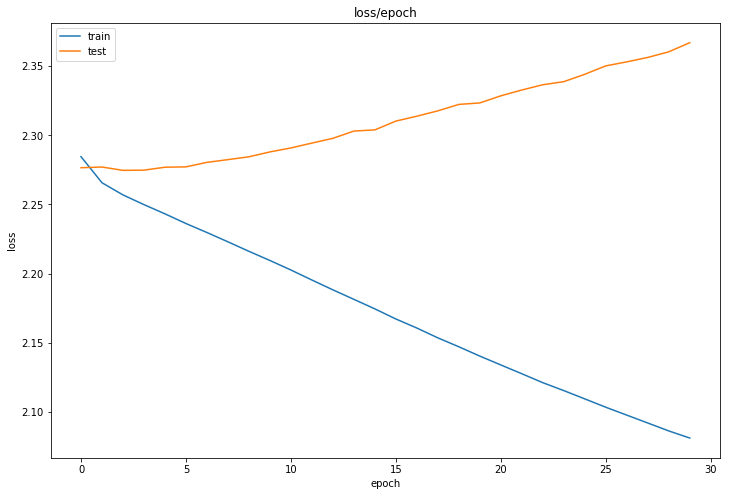

In [30]:
plot_loss(history[3])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
predicted = model.predict_classes(test_x)

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
conf = confusion_matrix(argmax(test_y, axis=1), predicted, classes)
print(conf)

In [ ]:
plt.figure()
plot_confusion_matrix(conf, classes)